# PDF to Text - 01 FCC Complaints about How I Met Your Mother series

### YOUR ASSIGNMENT
1.	Find three PDF-based datasets,
2.	Convert them to a machine-readable format (txt, csv, etc), and
3.	Do a little something with them.

What is "a little something"?   
•	If you create a text file, clean it up if necessary and extract some information from it. For example, for the custodial_reports  you could have extracted the Report Date and the Agency Number. You can do this work in either Python or a text editor (depending on which is best).  
•	If make a CSV file, clean it up however necessary and ask it a few questions. For example, with the marijuana dataset we could have graphed the change in marijuana arrests over time.  
•	If you extracted right from Python, you should save it in some nice format (a txt file or a csv file)  
The focus of this assignment is generating machine-readable data, so your analysis doesn't have to be very interesting at all.  

SUBMITTING
Create a folder for each dataset on your GitHub repository. This folder should include
1.	The original data
2.	The cleaned data
3.	Any files you used in the process (uzn files, notebooks, etc)
4.	A summary of what you did (see below)

The summary should be a .txt or .md file explaining:  
•	The MuckRock page you got it from  
•	A one-sentence summary of what the data is  
•	A short description of how you processed/cleaned it  

In [1]:
import pdfquery
import re
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from geopy.geocoders import Nominatim
%matplotlib inline

### Load the PDF with PDFQuery

In [2]:
HIMYM_FCC = pdfquery.PDFQuery('Complaints_for_2015-586.pdf')
HIMYM_FCC.load()

#### How many pages it has

In [3]:
# Source: https://stackoverflow.com/questions/33375073/how-to-get-total-number-of-pages-in-pdfquery
pages_count = HIMYM_FCC.doc.catalog['Pages'].resolve()['Count']
pages_count

17

#### Trying to extract Location and other details from the PDF with PDFQuery
(Doesn't work as nicely)

In [4]:
location = HIMYM_FCC.pq('LTTextLineHorizontal:contains("City / State / Zip : ")')
location = location.text().split(' : ')
location

['City / State / Zip',
 'KENNER LA 70065 City / State / Zip',
 'HUNTSVILLE TX 77340 City / State / Zip',
 'TRAPHILL NC 28685 City / State / Zip',
 'MASON OH 45040 City / State / Zip',
 'City / State / Zip',
 'CHARLOTTESVILLE VA 22901 City / State / Zip',
 'YORKTOWN VA 23692 City / State / Zip',
 'CHESAPEAKE BEACH MD 20732 City / State / Zip',
 'City / State / Zip',
 'NORRISTOWN PA 19403 City / State / Zip',
 'EXCELSIOR MN 55331 City / State / Zip',
 'City / State / Zip',
 'MELBOURNE FL 32934 City / State / Zip',
 'City / State / Zip',
 'HENDERSONVILLE TN 37075 City / State / Zip',
 'HENDERSONVILLE TN 37075']

In [5]:
HIMYM_FCC.pq('LTTextLineHorizontal:contains("Problem Submitted Time : ")')#[0].layout

[<LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>, <LTTextLineHorizontal>]

In [6]:
time = HIMYM_FCC.pq('LTTextLineHorizontal:contains("Problem Submitted Time : ")')
time.text()# = time.text().split(' : ')

'Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time : Problem Submitted Time :'

#### PDFQuery doesn't really work for this PDF, so let's use Soma's Kull (https://jsoma.github.io/kull/#/)

In [7]:
HIMYM_FCC.extract([
	('with_formatter', 'text'),
	('time', 'LTPage[pageid=\'1\'] LTTextLineHorizontal:overlaps_bbox("401,636,449,647")')
])

{'time': 'Problem Submitted Time : 3/17/2014 1:56:57AM'}

In [8]:
HIMYM_FCC = pdfquery.PDFQuery('Complaints_for_2015-586.pdf')

HIMYM_FCC.extract([
	('with_formatter', 'text'),
	('Unnamed0', 'LTPage[pageid=\'1\'] LTTextLineHorizontal:overlaps_bbox("367,637,544,662")'),
	('Unnamed1', 'LTPage[pageid=\'2\'] LTTextLineHorizontal:overlaps_bbox("367,637,543,660")'),
	('Unnamed2', 'LTPage[pageid=\'3\'] LTTextLineHorizontal:overlaps_bbox("366,635,545,662")'),
	('Unnamed3', 'LTPage[pageid=\'4\'] LTTextLineHorizontal:overlaps_bbox("366,637,544,661")')
])

{'Unnamed0': 'Problem Submitted Time : 3/17/2014 1:56:57AM',
 'Unnamed1': 'Problem Submitted Time : 1/27/2014 8:23:58PM',
 'Unnamed2': 'Problem Submitted Time : 4/2/2013 9:37:20PM',
 'Unnamed3': 'Problem Submitted Time : 3/17/2013 5:23:14PM'}

In [9]:
for i in range(1, pages_count):
    
    location = HIMYM_FCC.extract([
        ('with_formatter', 'text'),
        ('Location', "LTPage[pageid=\'" + str(i) + "\'] LTTextLineHorizontal:overlaps_bbox('26,588,209,601')")
    ])

    time = HIMYM_FCC.extract([
    ('with_formatter', 'text'),
    ('Time', "LTPage[pageid=\'" + str(i) + "\'] LTTextLineHorizontal:overlaps_bbox('366,635,543,660')")
    ])
    
    reason = HIMYM_FCC.extract([
    ('with_formatter', 'text'),
    ('Cause', "LTPage[pageid=\'" + str(i) + "\'] LTTextLineHorizontal:overlaps_bbox('377,668,529,698')")
    ])
    
    
    print(i, location)
    print(i, time)
    print(i, reason)
    print('----')

1 {'Location': 'Consumer Personal Information Omitted City / State / Zip : KENNER LA 70065'}
1 {'Time': 'Problem Submitted Time : 3/17/2014 1:56:57AM'}
1 {'Cause': 'Web Level Three : Profane'}
----
2 {'Location': 'Consumer Personal Information Omitted City / State / Zip : HUNTSVILLE TX 77340'}
2 {'Time': 'Problem Submitted Time : 1/27/2014 8:23:58PM'}
2 {'Cause': 'Web Level Three : Indecent'}
----
3 {'Location': 'Consumer Personal Information Omitted City / State / Zip : TRAPHILL NC 28685'}
3 {'Time': 'Problem Submitted Time : 4/2/2013 9:37:20PM'}
3 {'Cause': 'Web Level Three : Content Criticism'}
----
4 {'Location': 'Consumer Personal Information Omitted City / State / Zip : MASON OH 45040'}
4 {'Time': 'Problem Submitted Time : 3/17/2013 5:23:14PM'}
4 {'Cause': 'Web Level Three : Children'}
----
5 {'Location': 'Consumer Personal Information Omitted SOUTH WEYMOUTH MA 02190'}
5 {'Time': 'Problem Submitted Time : 3/4/2013 8:27:19PM'}
5 {'Cause': 'Web Level Three : Content Criticism'}
---

#### Put location and reason for complaint in a list
#### Turn it to DataFrame, build geometry and plot the origins of complaints on a US states map

In [10]:
himym_fcc = []
for i in range(1,pages_count):
    dictionary = {}
    location = HIMYM_FCC.extract([
        ('with_formatter', 'text'),
        ('Location', "LTPage[pageid=\'" + str(i) + "\'] LTTextLineHorizontal:overlaps_bbox('26,588,209,601')")
    ])

    time = HIMYM_FCC.extract([
    ('with_formatter', 'text'),
    ('Time', "LTPage[pageid=\'" + str(i) + "\'] LTTextLineHorizontal:overlaps_bbox('366,635,543,660')")
    ])
    
    reason = HIMYM_FCC.extract([
    ('with_formatter', 'text'),
    ('Cause', "LTPage[pageid=\'" + str(i) + "\'] LTTextLineHorizontal:overlaps_bbox('377,668,529,698')")
    ])
    
    dictionary['complaint_no'] = pages_count - i
    search_loc = re.split(r' : |d ', location['Location'])[-1]
    dictionary['location'] = search_loc
    try:
        dictionary['date'] = time['Time'].split(' : ')[1].split(' ')[0]
        dictionary['reason'] = reason['Cause'].split(' : ')[1]
    except:
        pass
    
    himym_fcc.append(dictionary)

himym_fcc

[{'complaint_no': 16,
  'date': '3/17/2014',
  'location': 'KENNER LA 70065',
  'reason': 'Profane'},
 {'complaint_no': 15,
  'date': '1/27/2014',
  'location': 'HUNTSVILLE TX 77340',
  'reason': 'Indecent'},
 {'complaint_no': 14,
  'date': '4/2/2013',
  'location': 'TRAPHILL NC 28685',
  'reason': 'Content Criticism'},
 {'complaint_no': 13,
  'date': '3/17/2013',
  'location': 'MASON OH 45040',
  'reason': 'Children'},
 {'complaint_no': 12,
  'date': '3/4/2013',
  'location': 'SOUTH WEYMOUTH MA 02190',
  'reason': 'Content Criticism'},
 {'complaint_no': 11,
  'date': '2/25/2013',
  'location': 'CHARLOTTESVILLE VA 22901',
  'reason': 'Content Criticism'},
 {'complaint_no': 10,
  'date': '1/10/2013',
  'location': 'YORKTOWN VA 23692',
  'reason': 'Indecent'},
 {'complaint_no': 9,
  'date': '11/1/2012',
  'location': 'CHESAPEAKE BEACH MD 20732',
  'reason': 'Content Criticism'},
 {'complaint_no': 8,
  'date': '9/10/2012',
  'location': 'POWELL OH 43065',
  'reason': 'Content Criticism'},

In [11]:
complaints = pd.DataFrame(himym_fcc)
complaints.dropna(inplace=True)
complaints

,complaint_no,date,location,reason
0,16,3/17/2014,KENNER LA 70065,Profane
1,15,1/27/2014,HUNTSVILLE TX 77340,Indecent
2,14,4/2/2013,TRAPHILL NC 28685,Content Criticism
3,13,3/17/2013,MASON OH 45040,Children
4,12,3/4/2013,SOUTH WEYMOUTH MA 02190,Content Criticism
5,11,2/25/2013,CHARLOTTESVILLE VA 22901,Content Criticism
6,10,1/10/2013,YORKTOWN VA 23692,Indecent
7,9,11/1/2012,CHESAPEAKE BEACH MD 20732,Content Criticism
8,8,9/10/2012,POWELL OH 43065,Content Criticism
10,6,8/24/2012,NORRISTOWN PA 19403,Content Criticism


In [12]:
complaints['date'] = pd.to_datetime(complaints['date'], format='%m/%d/%Y')
complaints.sort_values('date', inplace=True)
complaints

,complaint_no,date,location,reason
15,1,2012-02-13,HENDERSONVILLE TN 37075,Content Criticism
14,2,2012-03-20,PHILADELPHIA PA 19141,Indecent
13,3,2012-04-24,MELBOURNE FL 32934,Content Criticism
12,4,2012-08-09,POWELL OH 43065,Indecent
11,5,2012-08-13,EXCELSIOR MN 55331,Content Criticism
10,6,2012-08-24,NORRISTOWN PA 19403,Content Criticism
8,8,2012-09-10,POWELL OH 43065,Content Criticism
7,9,2012-11-01,CHESAPEAKE BEACH MD 20732,Content Criticism
6,10,2013-01-10,YORKTOWN VA 23692,Indecent
5,11,2013-02-25,CHARLOTTESVILLE VA 22901,Content Criticism


#### Use GeoPy.Geocoder to generate geometry

In [14]:
geolocator = Nominatim()
complaints['long'] = complaints.apply(lambda row: geolocator.geocode(row['location']).longitude, axis=1)
complaints['lat'] = complaints.apply(lambda row: geolocator.geocode(row['location']).latitude, axis=1)
complaints['geometry'] = complaints.apply(lambda row: Point(row.long, row.lat), axis=1)
complaints.head(6)

,complaint_no,date,location,reason,long,lat,geometry
15,1,2012-02-13,HENDERSONVILLE TN 37075,Content Criticism,-86.619996,36.304774,POINT (-86.6199957 36.3047735)
14,2,2012-03-20,PHILADELPHIA PA 19141,Indecent,-75.163590,39.952399,POINT (-75.16358990000001 39.9523993)
13,3,2012-04-24,MELBOURNE FL 32934,Content Criticism,-80.689143,28.148276,POINT (-80.6891430157431 28.1482757284746)
12,4,2012-08-09,POWELL OH 43065,Indecent,-83.085362,40.156685,POINT (-83.085362373552 40.1566846944088)
11,5,2012-08-13,EXCELSIOR MN 55331,Content Criticism,-93.566345,44.903296,POINT (-93.5663455 44.9032963)
10,6,2012-08-24,NORRISTOWN PA 19403,Content Criticism,-75.339905,40.121497,POINT (-75.3399048 40.121497)


In [15]:
complaints = gpd.GeoDataFrame(complaints)
complaints.head(6)

,complaint_no,date,location,reason,long,lat,geometry
15,1,2012-02-13,HENDERSONVILLE TN 37075,Content Criticism,-86.619996,36.304774,POINT (-86.6199957 36.3047735)
14,2,2012-03-20,PHILADELPHIA PA 19141,Indecent,-75.163590,39.952399,POINT (-75.16358990000001 39.9523993)
13,3,2012-04-24,MELBOURNE FL 32934,Content Criticism,-80.689143,28.148276,POINT (-80.6891430157431 28.1482757284746)
12,4,2012-08-09,POWELL OH 43065,Indecent,-83.085362,40.156685,POINT (-83.085362373552 40.1566846944088)
11,5,2012-08-13,EXCELSIOR MN 55331,Content Criticism,-93.566345,44.903296,POINT (-93.5663455 44.9032963)
10,6,2012-08-24,NORRISTOWN PA 19403,Content Criticism,-75.339905,40.121497,POINT (-75.3399048 40.121497)


#### Import States, generate the map

In [16]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [17]:
complaints.crs = {'init': 'epsg:4269'}
complaints.crs

{'init': 'epsg:4269'}

In [18]:
continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_states = states[states.within(continental_box)]

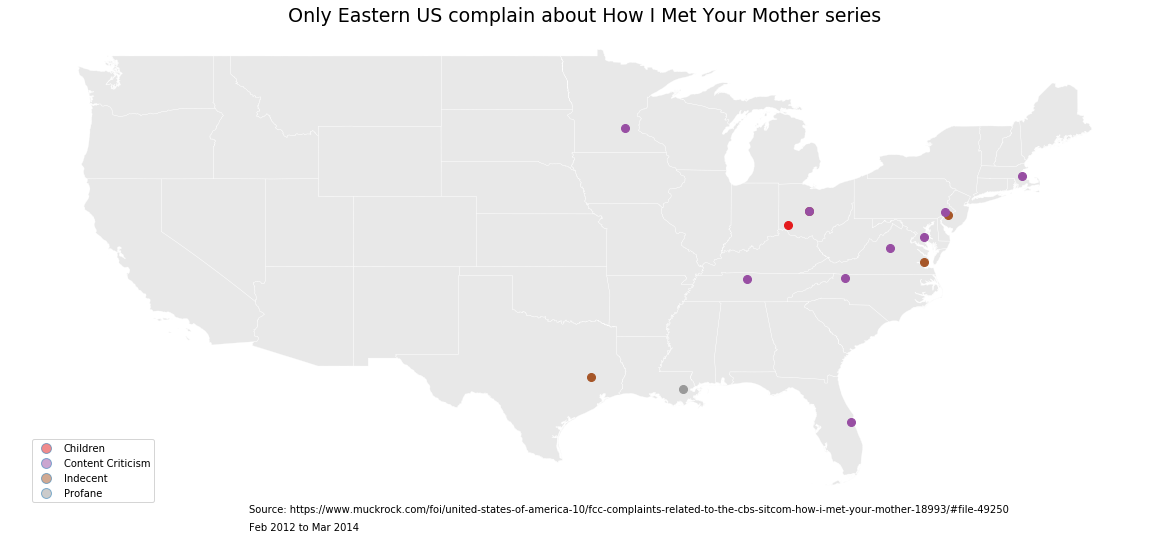

In [19]:
ax = continental_states.plot(color='lightgrey', figsize=(20,20), edgecolor='white', linewidth=0.25)
complaints.plot(ax=ax, column='reason', legend=True, markersize=8)
ax.axis('off')
ax.title.set_text('Only Eastern US complain about How I Met Your Mother series')
ax.title.set_color('black')
ax.title.set_fontsize(19)
ax.text(x=-115, y=23, s='Source: https://www.muckrock.com/foi/united-states-of-america-10/fcc-complaints-related-to-the-cbs-sitcom-how-i-met-your-mother-18993/#file-49250')
ax.text(x=-115, y=22, s='Feb 2012 to Mar 2014')